In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

La data fue extraida del repositorio de datos de la UCI. https://archive.ics.uci.edu

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
#print(mushroom.variables) 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [6]:
print(mushroom.variables) 

                        name     role         type demographic  \
0                  poisonous   Target  Categorical        None   
1                  cap-shape  Feature  Categorical        None   
2                cap-surface  Feature  Categorical        None   
3                  cap-color  Feature       Binary        None   
4                    bruises  Feature  Categorical        None   
5                       odor  Feature  Categorical        None   
6            gill-attachment  Feature  Categorical        None   
7               gill-spacing  Feature  Categorical        None   
8                  gill-size  Feature  Categorical        None   
9                 gill-color  Feature  Categorical        None   
10               stalk-shape  Feature  Categorical        None   
11                stalk-root  Feature  Categorical        None   
12  stalk-surface-above-ring  Feature  Categorical        None   
13  stalk-surface-below-ring  Feature  Categorical        None   
14    stal

In [5]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [9]:
X["stalk-root"].isna().sum()

2480

In [3]:
X["stalk-root"].unique()

array(['e', 'c', 'b', 'r', nan], dtype=object)

In [4]:
X["stalk-root"].describe()

count     5644
unique       4
top          b
freq      3776
Name: stalk-root, dtype: object

In [5]:
X["stalk-root"].mode()

0    b
Name: stalk-root, dtype: object

In [15]:
y

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [3]:
df = pd.concat([X,y], axis=1)

In [20]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


Aqui analisamos la columna que tiene valores nulos con respecto a nuestra columna respuesta
En principio vemos que no hay mucha correlacion entre las dos

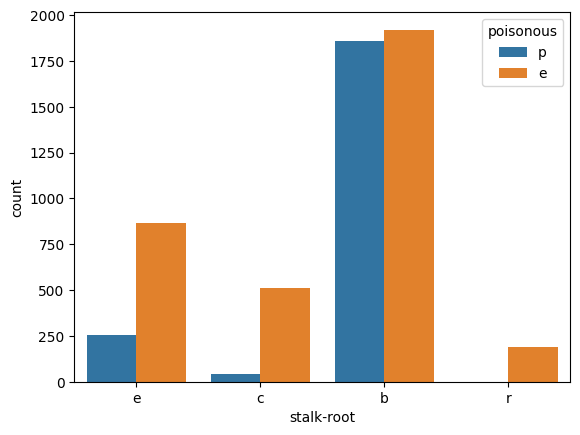

In [28]:
sns.countplot(x="stalk-root", hue="poisonous", data=df)
plt.show()

Primero decidimos ver como quedaria si imputamos la moda a los valores nulos
Por el resultado que observamos y despues de analizar otras opciones
decidimos eliminar la columna

In [16]:
X["stalk-root"]=X["stalk-root"].fillna(X["stalk-root"].mode().iloc[0])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19860\2673400555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["stalk-root"]=X["stalk-root"].fillna(X["stalk-root"].mode().iloc[0])


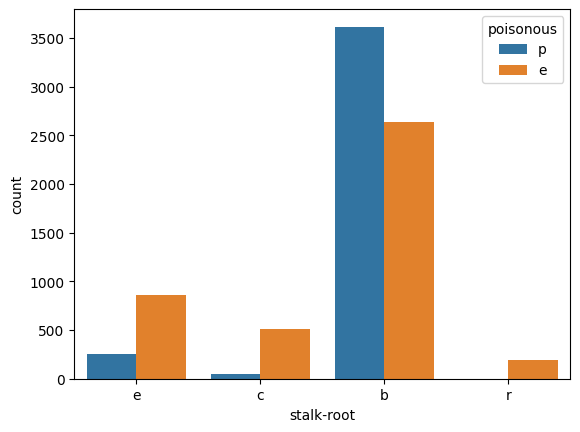

In [20]:
sns.countplot(x="stalk-root", hue="poisonous", data=df)
plt.show()

In [12]:
valores_nulos = df[df['stalk-root'].isnull()]

# Mostrar los valores nulos y sus clases asociadas
print(valores_nulos[['stalk-root', 'poisonous']])

     stalk-root poisonous
3984        NaN         e
4023        NaN         p
4076        NaN         e
4100        NaN         p
4104        NaN         p
...         ...       ...
8119        NaN         e
8120        NaN         e
8121        NaN         e
8122        NaN         p
8123        NaN         e

[2480 rows x 2 columns]


In [13]:
valores_nulos = df[df['stalk-root'].isnull()]

# Contar cuántos pertenecen a cada clase en 'poisonous'
conteo_por_clase = valores_nulos['poisonous'].value_counts()

# Mostrar el conteo
print(conteo_por_clase)

poisonous
p    1760
e     720
Name: count, dtype: int64


In [4]:
df = df.drop("stalk-root",axis=1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("poisonous",axis=1),
                                                    df["poisonous"],
                                                    train_size=0.8,
                                                    random_state=123,
                                                    shuffle=True)

In [17]:
x_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3930,f,y,g,f,f,f,c,b,h,e,...,k,p,b,p,w,o,l,h,y,p
2252,f,f,g,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,n,s,g
7720,b,s,g,f,n,f,w,b,w,e,...,k,w,w,p,w,t,p,w,s,g
1941,f,f,n,t,n,f,c,b,n,t,...,s,g,p,p,w,o,p,k,v,d
1538,x,s,g,f,n,f,w,b,p,t,...,f,w,w,p,w,o,e,n,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,x,y,y,f,f,f,c,b,h,e,...,k,b,b,p,w,o,l,h,v,g
1346,f,y,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,n,v,g
3454,x,f,w,f,c,f,w,n,u,e,...,s,w,w,p,w,o,p,n,s,d
7533,x,s,n,f,n,f,c,b,w,e,...,y,n,n,p,w,t,p,w,y,p


In [5]:
cols = x_train.select_dtypes(include=["object" , "category"]).columns.to_list()

preproc = ColumnTransformer([("onehot" , OneHotEncoder(handle_unknown="ignore", sparse_output=False),cols)],
                            remainder="passthrough",
                            verbose_feature_names_out = False).set_output(transform="pandas")

In [20]:
x_train_prep = preproc.fit_transform(x_train)
X_test_prep  = preproc.transform(x_test)

In [7]:
modelo = DecisionTreeClassifier(max_depth = 5,
                                criterion = "gini",
                                random_state = 123)

modelo.fit(x_train_prep,y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [14]:
predicciones = modelo.predict(X_test_prep)

confusion_matrix(y_true=y_test,
                 y_pred=predicciones)

array([[863,   0],
       [  1, 761]], dtype=int64)

In [39]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 99.93846153846154 %


In [52]:
f1 = f1_score(y_test,predicciones,pos_label="e")

print(f"Fi score es: {f1}")

Fi score es: 0.9994209612044007


In [48]:
presicion = precision_score(y_test,predicciones,pos_label="e")

print(f"la presicion es de: {100*presicion}%")

la presicion es de: 99.88425925925925%


In [50]:
recall = recall_score(y_test,predicciones,pos_label="e")
print(recall)

1.0


In [14]:
score = cross_val_score(modelo,x_train_prep,y_train , cv=10)

print("Precisión de cada fold:", score)
print("Precisión media: {:.2f}%".format(score.mean() * 100))


Precisión de cada fold: [0.99846154 0.99384615 1.         0.99846154 0.99846154 1.
 0.99846154 1.         1.         1.        ]
Precisión media: 99.88%


In [18]:
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

grid = GridSearchCV(estimator=DecisionTreeClassifier(max_depth=None ,
                                                     min_samples_split=2,
                                                     min_samples_leaf=1,
                                                     random_state=1234),
                    param_grid=param_grid,
                    scoring="accuracy",
                    cv=10,
                    refit=True,
                    return_train_score=True)

grid.fit(x_train_prep,y_train)

grid.best_params_

{'ccp_alpha': 0.0}

In [19]:
modelo_final = grid.best_estimator_

print(f"Profundidad del arbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del arbol: 7
Número de nodos terminales: 14


In [21]:
predicciones = modelo_final.predict(X_test_prep)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 100.0 %
